# COCO 2017 数据集

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    if len(filenames) > 0:
        print(dirname, ' : ', len(filenames))
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        print('----------', filename)
        if 'jpg' in filename:
            break

/kaggle/input/coco-2017-dataset/coco2017/val2017  :  5000
---------- 000000011197.jpg
/kaggle/input/coco-2017-dataset/coco2017/annotations  :  6
---------- person_keypoints_train2017.json
---------- instances_val2017.json
---------- instances_train2017.json
---------- person_keypoints_val2017.json
---------- captions_train2017.json
---------- captions_val2017.json
/kaggle/input/coco-2017-dataset/coco2017/test2017  :  40670
---------- 000000355443.jpg
/kaggle/input/coco-2017-dataset/coco2017/train2017  :  118287
---------- 000000501175.jpg


 - val2017 5000张验证图片    
   > instances_val2017.json       
   > person_keypoints_val2017.json        
   > captions_val2017.json       
 - annotations json格式数据      
 - test2017 40670张测试图片      
 - train2017 118287张训练图片       
   > person_keypoints_train2017.json        
   > instances_train2017.json       
   > captions_train2017.json    

# instances_val2017.json    物体
 - 图片名称、物体分类、物体矩形框、物体边缘

In [2]:
import json
file = open('/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_val2017.json')
json_data = json.load(file)
print('-----'*10, '\n数据结构:', json_data.keys())
print('-----'*10, '\n基本信息:', json_data['info'])
print('-----'*10, '\n许可证:', json_data['licenses'])
print('-----'*10, '\n图片数量:', len(json_data['images']))
print(json_data['images'][0])
print('-----'*10, '\n物体数量:', len(json_data['annotations']))
print(json_data['annotations'][0].keys())
print(json_data['annotations'][0])
print('-----'*10, '\n类别数量:', len(json_data['categories']))
print(json_data['categories'])

-------------------------------------------------- 
数据结构: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
-------------------------------------------------- 
基本信息: {'description': 'COCO 2017 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2017, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}
-------------------------------------------------- 
许可证: [{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nc/2.0/', 'id': 2, 'name': 'Attribution-NonCommercial License'}, {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'id': 3, 'name': 'Attribution-NonCommercial-NoDerivs License'}, {'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 4, 'name': 'Attribution License'}, {'url': 'http://creativecommons.org/licenses/by-sa/2.0/', 'id': 5, 'name': 'Attribution-ShareAlike License'}, {'url': 'http://cr

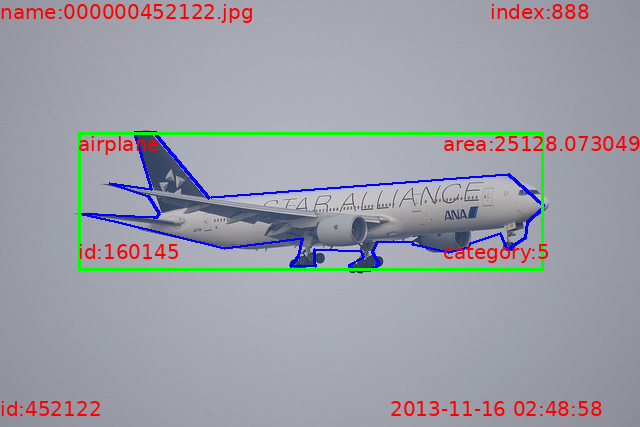

In [3]:
import PIL.Image, PIL.ImageDraw, PIL.ImageFont
font = PIL.ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 20)
index = 888
directory = '/kaggle/input/coco-2017-dataset/coco2017/val2017/'
im = PIL.Image.open(directory + json_data['images'][index]['file_name'])
draw = PIL.ImageDraw.Draw(im)
draw.text((0,0),'name:'+json_data['images'][index]['file_name'],font=font,fill=(255,0,0))
w = json_data['images'][index]['width']
h = json_data['images'][index]['height']
draw.text((w-150,0),'index:'+str(index),font=font,fill=(255,0,0))
draw.text((0,h-30),'id:'+str(json_data['images'][index]['id']),font=font,fill=(255,0,0))
draw.text((w-250,h-30),str(json_data['images'][index]['date_captured']),font=font,fill=(255,0,0))
for annotation in json_data['annotations']:
    if annotation['image_id'] == json_data['images'][index]['id']:
        segmentation = annotation['segmentation']
        line = []
        for i in range(int(len(segmentation[0])/2)):
            line.append((int(segmentation[0][i*2]), int(segmentation[0][i*2+1])))
        draw.line(line,fill=(0,0,255),width=3)
        bbox = annotation['bbox']
        x1 = bbox[0]
        y1 = bbox[1]
        x2 = bbox[0] + bbox[2]
        y2 = bbox[1] + bbox[3]
        draw.rectangle([x1,y1,x2,y2],outline=(0,255,0),width=3)
        for category in json_data['categories']:
            if category['id'] == annotation['category_id']:
                draw.text((x1,y1),category['name'],font=font,fill=(255,0,0))
        draw.text((x2-100,y2-30),'category:'+str(annotation['category_id']),font=font,fill=(255,0,0))
        draw.text((x1,y2-30),'id:'+str(annotation['id']),font=font,fill=(255,0,0))
        draw.text((x2-100,y1),'area:'+str(annotation['area']),font=font,fill=(255,0,0))
display(im)

# captions_val2017.json    图片描述

In [4]:
import json
file = open('/kaggle/input/coco-2017-dataset/coco2017/annotations/captions_val2017.json')
json_data = json.load(file)
print('-----'*10, '\n数据结构:', json_data.keys())
print('-----'*10, '\n基本信息:', json_data['info'])
print('-----'*10, '\n许可证:', json_data['licenses'])
print('-----'*10, '\n图片数量:', len(json_data['images']))
print(json_data['images'][0])
print('-----'*10, '\n主题数量:', len(json_data['annotations']))
print(json_data['annotations'][0].keys())
print(json_data['annotations'][0])

-------------------------------------------------- 
数据结构: dict_keys(['info', 'licenses', 'images', 'annotations'])
-------------------------------------------------- 
基本信息: {'description': 'COCO 2017 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2017, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}
-------------------------------------------------- 
许可证: [{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nc/2.0/', 'id': 2, 'name': 'Attribution-NonCommercial License'}, {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'id': 3, 'name': 'Attribution-NonCommercial-NoDerivs License'}, {'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 4, 'name': 'Attribution License'}, {'url': 'http://creativecommons.org/licenses/by-sa/2.0/', 'id': 5, 'name': 'Attribution-ShareAlike License'}, {'url': 'http://creativecommons.

595096:A cat sitting on top of a banana tree.
595468:a cat is way up in a tree
743749:A small cat sitting in the top of a banana tree.
746041:A cat sitting in a tree, staring at the camera.
746626:A cat resting in the top of a palm tree on a clear day.


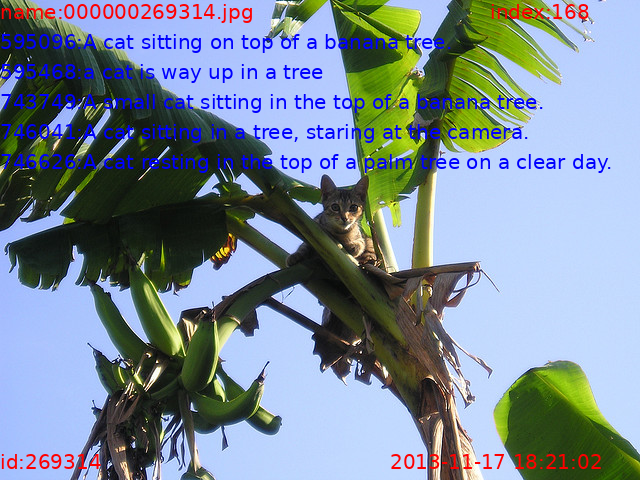

In [5]:
import PIL.Image, PIL.ImageDraw, PIL.ImageFont
font = PIL.ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 20)
index = 168
directory = '/kaggle/input/coco-2017-dataset/coco2017/val2017/'
im = PIL.Image.open(directory + json_data['images'][index]['file_name'])
draw = PIL.ImageDraw.Draw(im)
draw.text((0,0),'name:'+json_data['images'][index]['file_name'],font=font,fill=(255,0,0))
w = json_data['images'][index]['width']
h = json_data['images'][index]['height']
draw.text((w-150,0),'index:'+str(index),font=font,fill=(255,0,0))
draw.text((0,h-30),'id:'+str(json_data['images'][index]['id']),font=font,fill=(255,0,0))
draw.text((w-250,h-30),str(json_data['images'][index]['date_captured']),font=font,fill=(255,0,0))
y = 30
for annotation in json_data['annotations']:
    if annotation['image_id'] == json_data['images'][index]['id']:
        draw.text((0,y),str(annotation['id'])+':'+annotation['caption'],font=font,fill=(0,0,255))
        print(str(annotation['id'])+':'+annotation['caption'])
        y += 30
display(im)

# person_keypoints_val2017.json  人体姿态    
 - skeleton 连接性 第几个关键点连接第几个关键点    
 - keypoints x坐标 y坐标 0没标注 1不可见 2可见 3xk

In [6]:
import json
file = open('/kaggle/input/coco-2017-dataset/coco2017/annotations/person_keypoints_val2017.json')
json_data = json.load(file)
print('-----'*10, '\n数据结构:', json_data.keys())
print('-----'*10, '\n基本信息:', json_data['info'])
print('-----'*10, '\n许可证:', json_data['licenses'])
print('-----'*10, '\n图片数量:', len(json_data['images']))
print(json_data['images'][0])
print('-----'*10, '\n人体数量:', len(json_data['annotations']))
print(json_data['annotations'][0].keys())
print(json_data['annotations'][0])
print('-----'*10, '\n类别数量:', len(json_data['categories']))
print(json_data['categories'])

-------------------------------------------------- 
数据结构: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
-------------------------------------------------- 
基本信息: {'description': 'COCO 2017 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2017, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}
-------------------------------------------------- 
许可证: [{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nc/2.0/', 'id': 2, 'name': 'Attribution-NonCommercial License'}, {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'id': 3, 'name': 'Attribution-NonCommercial-NoDerivs License'}, {'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 4, 'name': 'Attribution License'}, {'url': 'http://creativecommons.org/licenses/by-sa/2.0/', 'id': 5, 'name': 'Attribution-ShareAlike License'}, {'url': 'http://cr

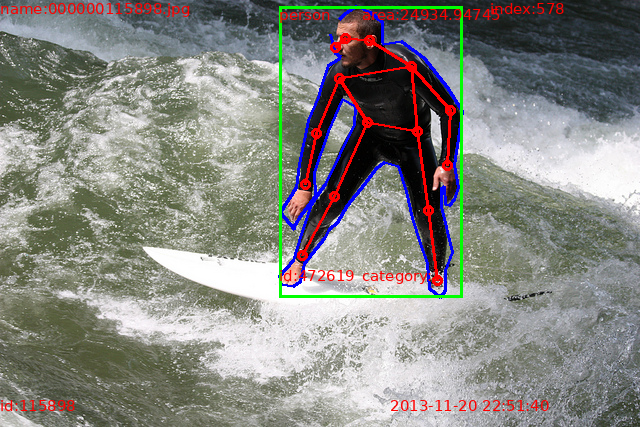

In [7]:
import PIL.Image, PIL.ImageDraw, PIL.ImageFont
font = PIL.ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 15)
index = 578
directory = '/kaggle/input/coco-2017-dataset/coco2017/val2017/'
im = PIL.Image.open(directory + json_data['images'][index]['file_name'])
draw = PIL.ImageDraw.Draw(im)
draw.text((0,0),'name:'+json_data['images'][index]['file_name'],font=font,fill=(255,0,0))
w = json_data['images'][index]['width']
h = json_data['images'][index]['height']
draw.text((w-150,0),'index:'+str(index),font=font,fill=(255,0,0))
draw.text((0,h-30),'id:'+str(json_data['images'][index]['id']),font=font,fill=(255,0,0))
draw.text((w-250,h-30),str(json_data['images'][index]['date_captured']),font=font,fill=(255,0,0))
for annotation in json_data['annotations']:
    if annotation['image_id'] == json_data['images'][index]['id']:
        segmentation = annotation['segmentation']
        line = []
        for i in range(int(len(segmentation[0])/2)):
            line.append((int(segmentation[0][i*2]), int(segmentation[0][i*2+1])))
        draw.line(line,fill=(0,0,255),width=3)
        keypoints = annotation['keypoints']
        pos_line = []
        for i in range(int(len(keypoints)/3)):
            pos_line.append((keypoints[i*3+0],keypoints[i*3+1],keypoints[i*3+2]))
            if int(keypoints[i*3+2]) == 2:
                cx1 = int(keypoints[i*3+0])-5
                cy1 = int(keypoints[i*3+1])-5
                cx2 = int(keypoints[i*3+0])+5
                cy2 = int(keypoints[i*3+1])+5
                draw.arc([cx1,cy1,cx2,cy2], 0, 360, fill=(255,0,0), width=3)
        for skeleton in json_data['categories'][0]['skeleton']:
            if pos_line[skeleton[0]-1][2] == 2 and pos_line[skeleton[1]-1][2] == 2:
                lx1 = int(pos_line[skeleton[0]-1][0])
                ly1 = int(pos_line[skeleton[0]-1][1])
                lx2 = int(pos_line[skeleton[1]-1][0])
                ly2 = int(pos_line[skeleton[1]-1][1])
                draw.line([lx1,ly1,lx2,ly2], fill=(255,0,0), width=3)
        bbox = annotation['bbox']
        x1 = bbox[0]
        y1 = bbox[1]
        x2 = bbox[0] + bbox[2]
        y2 = bbox[1] + bbox[3]
        draw.rectangle([x1,y1,x2,y2],outline=(0,255,0),width=3)
        for category in json_data['categories']:
            if category['id'] == annotation['category_id']:
                draw.text((x1,y1),category['name'],font=font,fill=(255,0,0))
        draw.text((x2-100,y2-30),'category:'+str(annotation['category_id']),font=font,fill=(255,0,0))
        draw.text((x1,y2-30),'id:'+str(annotation['id']),font=font,fill=(255,0,0))
        draw.text((x2-100,y1),'area:'+str(annotation['area']),font=font,fill=(255,0,0))
display(im)